In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('composite_data.csv')
df = df[['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'level_excited']]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32949 entries, 0 to 32948
Data columns (total 9 columns):
first            32949 non-null float64
second           32949 non-null float64
third            32949 non-null float64
fourth           32949 non-null float64
fifth            32949 non-null float64
sixth            32949 non-null float64
seventh          32949 non-null float64
eighth           32949 non-null float64
level_excited    32949 non-null int64
dtypes: float64(8), int64(1)
memory usage: 2.3 MB


## Data Visualisation

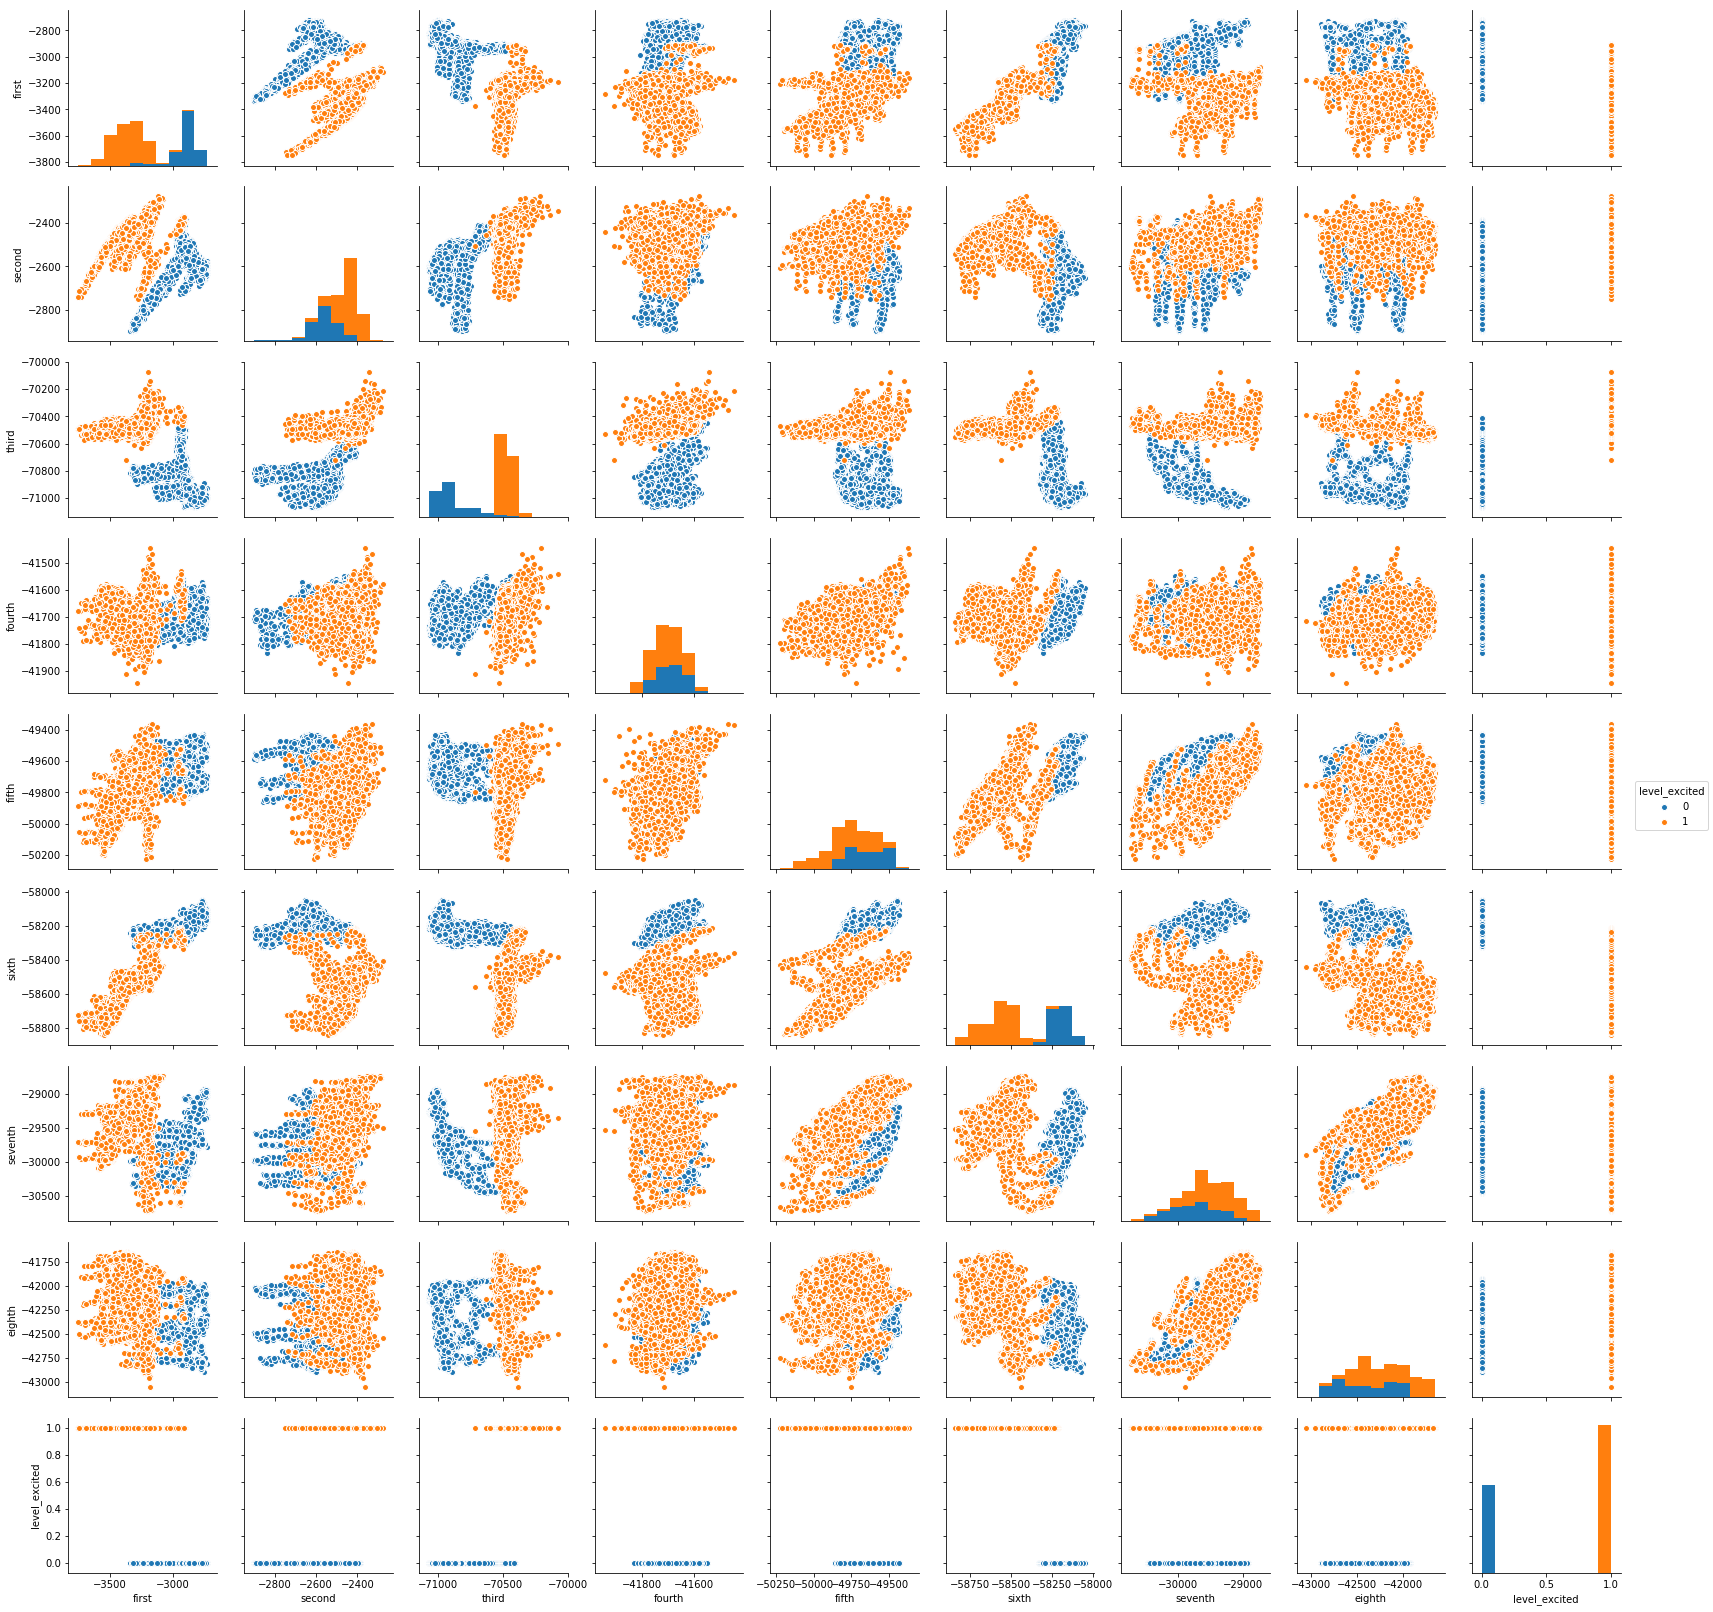

In [86]:
sns.pairplot(df, hue='level_excited')

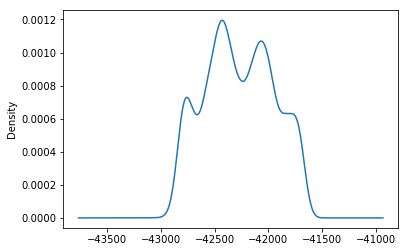

In [21]:
df['eighth'].plot.kde()

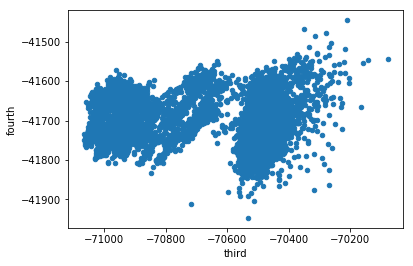

In [30]:
df.plot.scatter(x='seventh',y='fourth')

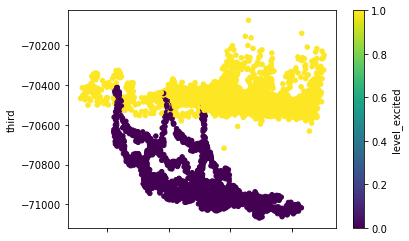

In [45]:
df.plot.scatter(x='seventh',y='third', c='level_excited', cmap='viridis')

## Data Processing

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('level_excited',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_features = scaler.transform(df.drop('level_excited',axis=1))

In [7]:
df_feat = df[['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['level_excited'],
                                                    test_size=0.30)

## Training(KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Training(SVM)

In [11]:
from sklearn.svm import SVC
model = SVC(C=1, gamma=1)
model.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testing(SVM)

In [12]:
predictions = model.predict(X_test)

In [13]:
len(df)

32949

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[4165   48]
 [  60 5612]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4213
          1       0.99      0.99      0.99      5672

avg / total       0.99      0.99      0.99      9885



## Testing(KNN)

In [16]:
pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[4213    0]
 [   0 5672]]


In [18]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4213
          1       1.00      1.00      1.00      5672

avg / total       1.00      1.00      1.00      9885



## Testing with different data

In [19]:
test_df = pd.read_csv('Sumanjit_da.csv')
test_df = test_df[['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'level_excited']]

In [20]:
scaler1 = StandardScaler()

In [21]:
scaler1.fit(test_df.drop('level_excited',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_features1 = scaler.transform(test_df.drop('level_excited',axis=1))

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features1,test_df['level_excited'],
                                                    test_size=0.95)

In [24]:
pred = knn.predict(X_test1)

In [25]:
print(confusion_matrix(y_test1,pred))

[[3348    0]
 [   0 3999]]


In [26]:
print(classification_report(y_test1,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3348
          1       1.00      1.00      1.00      3999

avg / total       1.00      1.00      1.00      7347



In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [159]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.9548705943555729, total=   7.1s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  kernel=rbf, C=0.1, gamma=1, score=0.9531737773152965, total=   7.3s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.4s remaining:    0.0s


[CV]  kernel=rbf, C=0.1, gamma=1, score=0.9598022635618577, total=   7.1s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7803355442840422, total=  11.2s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7712018730489074, total=  11.3s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7852218030441004, total=  11.2s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV]  kernel=rbf, C=0.1, gamma=0.01, score=0.573546625048771, total=  13.2s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV]  kernel=rbf, C=0.1, gamma=0.01, score=0.5734911550468262, total=  13.2s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV]  kernel=rbf, C=0.1, gamma=0.01, score=0.5735657603746586, total=  13.3s
[CV] kernel=rbf, C=0.1, gamma=0.001 ......

KeyboardInterrupt: 

In [85]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [86]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
grid_predictions = grid.predict(testX)

In [88]:
print(confusion_matrix(testY,grid_predictions))

[[   0 3458]
 [   0 4196]]


In [28]:
print(classification_report(testY,pred))

NameError: name 'testY' is not defined

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.78      0.86      4213
          1       0.86      0.97      0.91      5672

avg / total       0.90      0.89      0.89      9885

